<a href="https://colab.research.google.com/github/rayannoyma/Projeto-Shark-Attacks/blob/main/projeto_shark_attacks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Projeto Shark Attack**



In [1]:
import pandas as pd
import numpy as np

In [ ]:
#criando um df
shark_attacks = pd.read_excel('GSAF5.xls')
shark_attacks

In [3]:
#limpando os espaços dos nomes das colunas no df
shark_attacks = shark_attacks.rename(columns=lambda x: x.strip().replace(" ", ""))

In [4]:
shark_attacks.columns

Index(['Date', 'Year', 'Type', 'Country', 'Area', 'Location', 'Activity',
       'Name', 'Sex', 'Age', 'Injury', 'Fatal(Y/N)', 'Time', 'Species',
       'InvestigatororSource', 'pdf', 'hrefformula', 'href', 'CaseNumber',
       'CaseNumber.1', 'originalorder', 'Unnamed:21', 'Unnamed:22'],
      dtype='object')

In [5]:
#limpando os espaços vazios na coluna 'Year'
shark_attacks = shark_attacks.dropna(subset=['Year'])

In [6]:
#transfomando em inteiros os valores de 'Year'
shark_attacks['Year'] = shark_attacks['Year'].astype(int)

In [7]:
#substituindo os elementos que tinham espaços sobrando na coluna 'Sex'
shark_attacks['Sex'] = shark_attacks['Sex'].replace({'M ': 'M'})

In [8]:
#substituindo os nomes repetidos da coluna 'Location'
shark_attacks['Location'] = shark_attacks['Location'].replace({'Daytona Beach Shores, Volusia County' : 'Daytona Beach, Volusia County', 'Ponce Inlet, New Smyrna Beach, Volusia County' : 'New Smyrna Beach, Volusia County', 'Ponce Inlet, Volusia County':'New Smyrna Beach, Volusia County' })

In [9]:
# DataFrame com informações relevantes para o projeto
new_df = shark_attacks.loc[:,['Year','Location','Sex']]
new_df

,Year,Location,Sex
0,2023,"Blue Fish Channel, Key West, Monroe County",M
1,2023,Delta Island,M
2,2023,Anaehoomalu Bay,M
3,2023,Cancún,M
4,2023,Cheynes Beach,F
...,...,...,...
6835,0,Roebuck Bay,M
6836,0,NaN,M
6837,0,Ocracoke Inlet,M
6838,0,"Panama Bay 8ºN, 79ºW",M


In [10]:
# Recorte dos ataques a partir dos anos 2000
new_df1 = shark_attacks.loc[shark_attacks['Year'] >= 2000]

In [11]:
# Criando um novo df com a intersecção do 'Year' e 'Location'
new_df2 = new_df1['Location'].value_counts().head(10).index.tolist()
new_df3 = new_df1[new_df1['Location'].isin(new_df2)]

In [12]:
# Recorte dos 10 lugares com mais ataques
new_df2

['New Smyrna Beach, Volusia County',
 'Daytona Beach, Volusia County',
 'Cocoa Beach, Brevard  County',
 'Myrtle Beach, Horry County',
 'Melbourne Beach, Brevard County',
 'Jacksonville Beach, Duval County',
 'Isle of Palms, Charleston County',
 'Quy Nhon ',
 'Vero Beach, Indian River County',
 'Florida Keys, Monroe County']

In [ ]:
# Novo dataframe com dos Lugares de mais ataques no periodo recortado
new_df3

In [14]:
# Indice de genero nos ataques  em relação aperiodo
new_df3['Sex'].value_counts()

M    222
F     61
Name: Sex, dtype: int64

In [15]:
new_df3['Sex'].unique()

array(['F', 'M', nan], dtype=object)

In [16]:
# Dataframe Final
df_final = new_df3.loc[:,['Year','Location','Sex']].reset_index()
df_final = df_final.groupby(['Year','Location','Sex'],as_index=False).count()

In [17]:
df_final

,Year,Location,Sex,index
0,2000,"Daytona Beach, Volusia County",F,1
1,2000,"Daytona Beach, Volusia County",M,1
2,2000,"New Smyrna Beach, Volusia County",M,5
3,2000,"Vero Beach, Indian River County",M,1
4,2001,"Myrtle Beach, Horry County",F,1
...,...,...,...,...
109,2022,"Daytona Beach, Volusia County",M,1
110,2022,"Florida Keys, Monroe County",M,1
111,2022,"Myrtle Beach, Horry County",F,2
112,2022,"Myrtle Beach, Horry County",M,1


<ipython-input-19-ca51acad4246>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(df_final, x = 'Year', y = 'index', hue='Sex', ci=None)


<Axes: xlabel='Year', ylabel='index'>

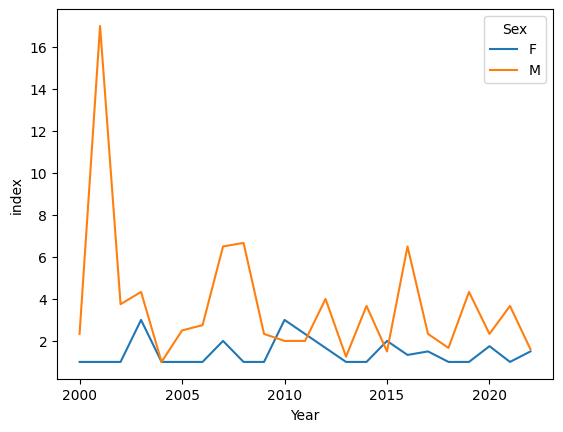

In [19]:
#criando um grafico com as informações obtidas
import seaborn as sns

sns.lineplot(df_final, x = 'Year', y = 'index', hue='Sex', ci=None)
